<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part4_alpha_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 5.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=8dff0d12fd465219a921eb29b5a009fc0c36ad6b3729fae7e83d2e5d3b2ca653
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma, alpha, mu):
    S, E, I, R = y
    dSdt = mu - (beta * S * I) - mu*S
    dEdt = (beta * S * I)  - (mu + alpha)*E
    dIdt = (alpha*E) - (mu + gamma)*I
    dRdt = gamma*I   -  mu*R
    return dSdt, dEdt, dIdt, dRdt

In [3]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [4]:
""" alpha is a list of 1000 random number in (0.05,1) """

import random
alpha = []
for i in range(1000):
    alpha.append(random.uniform(0, 1))
    


In [5]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [6]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [7]:
mu =  0.0133

In [8]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)

In [9]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)

In [10]:
alpha_list = []
for i in range(1000):
  for j in range(10):
    alpha_list.append(alpha[i])  
  
Alpha = pd.DataFrame(alpha_list)

In [13]:
""" P, Q, M, T are the list of S, E, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M = []
T = []
for i in range(1000): #Plotted for 2 sets
  N = 1
  S0, E0, I0, R0 = 0.99,0.005,0.005,0   # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, E0, I0, R0 # Initial conditions vector
  # Integrate the SEIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i], alpha[i],mu))
  S, E, I, R = ret.T
  P.append(S)
  Q.append(E)
  M.append(I)
  T.append(R)

  

In [17]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
E_value = pd.DataFrame(Q)
I_value = pd.DataFrame(M)
R_value = pd.DataFrame(T)

In [18]:
""" S_list, E_list, I_list, R_list are the list of S, E, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, E_list, I_list, R_list are  lists of 1000 itens and each item itself list of 10 values 
    and S_actual, E_actual, I_actual, R_actual are list of S, E, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """


S_list = []
S_actual = []
E_list = []
E_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  E_list.append(E_value[p].iloc[i].to_list())
  E_actual.append(E_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [19]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

exposed_list = []
for i in range(1000):
 exposed_list = exposed_list+E_list[i] 

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]

susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

exposedactual_list = []
for i in range(1000):
 exposedactual_list = exposedactual_list+E_actual[i]  

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [20]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(exposed_list)
df_3 = pd.DataFrame(infected_list)
df_4 = pd.DataFrame(recov_list)
df_5 = pd.DataFrame(susactual_list)
df_6 = pd.DataFrame(exposedactual_list)
df_7 = pd.DataFrame(infectedactual_list)
df_8 = pd.DataFrame(recovactual_list)

In [21]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,Beta,Gamma,Alpha], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.923360,0.010937,0.039598,0.026105,0.921885,0.011123,0.040321,0.026672,0.067925,0.022965,0.196877
1,0.982888,0.003154,0.010791,0.003168,0.982391,0.003213,0.011022,0.003375,0.067925,0.022965,0.196877
2,0.987781,0.002935,0.008222,0.001063,0.987385,0.002884,0.008491,0.001239,0.067925,0.022965,0.196877
3,0.988878,0.003322,0.007240,0.000560,0.988530,0.003142,0.007606,0.000722,0.067925,0.022965,0.196877
4,0.963628,0.005681,0.019912,0.010778,0.962802,0.005791,0.020312,0.011095,0.067925,0.022965,0.196877


In [22]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7,8,9,10]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [23]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.918773,0.046177,0.175221,0.031033,0.917110,0.047052,0.178324,0.031335,0.020684,0.018465,0.196627
1,0.986451,0.013190,0.047745,0.003766,0.985825,0.013466,0.048742,0.003909,0.020684,0.018465,0.196627
2,0.992013,0.012262,0.036377,0.001263,0.991497,0.012072,0.037549,0.001395,0.020684,0.018465,0.196627
3,0.993261,0.013902,0.032031,0.000666,0.992797,0.013167,0.033633,0.000787,0.020684,0.018465,0.196627
4,0.964555,0.023901,0.088109,0.012813,0.963578,0.024414,0.089831,0.012997,0.020684,0.018465,0.196627
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.954683,0.009196,0.060499,0.034676,0.952859,0.009357,0.061475,0.035831,0.055671,0.120535,0.955386
9996,0.864777,0.014365,0.101165,0.116309,0.862939,0.014447,0.101659,0.116935,0.055671,0.120535,0.955386
9997,0.849883,0.014708,0.104927,0.130775,0.848180,0.014765,0.105241,0.131193,0.055671,0.120535,0.955386
9998,0.956468,0.009053,0.059493,0.033120,0.954656,0.009214,0.060467,0.034276,0.055671,0.120535,0.955386


In [24]:
data_scaled[[0,1,2,3,4,5,6,7,8,9,10]] = data_scaled[[0,1,2,3,4,5,6,7,8,9,10]].apply(lambda x: x*100) 

In [25]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,91.877273,4.617734,17.522135,3.103302,91.710968,4.705152,17.832421,3.133534,2.068420,1.846478,19.662711
1,98.645081,1.319017,4.774465,0.376556,98.582507,1.346595,4.874183,0.390874,2.068420,1.846478,19.662711
2,99.201338,1.226228,3.637714,0.126327,99.149688,1.207234,3.754887,0.139502,2.068420,1.846478,19.662711
3,99.326102,1.390240,3.203129,0.066617,99.279654,1.316724,3.363305,0.078651,2.068420,1.846478,19.662711
4,96.455458,2.390051,8.810897,1.281302,96.357830,2.441354,8.983126,1.299735,2.068420,1.846478,19.662711
...,...,...,...,...,...,...,...,...,...,...,...
9995,95.468294,0.919568,6.049876,3.467649,95.285937,0.935692,6.147524,3.583089,5.567066,12.053529,95.538629
9996,86.477670,1.436518,10.116529,11.630876,86.293920,1.444689,10.165876,11.693479,5.567066,12.053529,95.538629
9997,84.988271,1.470795,10.492685,13.077541,84.817966,1.476462,10.524123,13.119282,5.567066,12.053529,95.538629
9998,95.646840,0.905297,5.949348,3.311968,95.465613,0.921395,6.046696,3.427639,5.567066,12.053529,95.538629


In [26]:
X = data_scaled[[0,1,2,3,4,5,6,7]]
y = data_scaled[10]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [29]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [32]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [33]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 8.1877612 for 607 rounds
CV with max_depth=9, min_child_weight=6
[02:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [34]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [35]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 7.9555784 for 700 rounds
CV with subsample=1.0, colsample=0.9
[02:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:

In [36]:
params['subsample'] = 0.7
params['colsample_bytree'] = 1

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
CV with eta=0.3
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 49 s, sys: 163 ms, total: 49.2 s
Wall time: 24.8 s
	MAE 7.932004999999999 for 437 rounds

CV with eta=0.2
[02:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:46] WARNING: /workspace/src/o

In [37]:
params['eta'] = .1

In [38]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[06:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:44.5718
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:40.2589
[2]	DEV-mae:36.4326
[3]	DEV-mae:32.962
[4]	DEV-mae:29.914
[5]	DEV-mae:27.2531
[6]	DEV-mae:24.8744
[7]	DEV-mae:22.8043
[8]	DEV-mae:20.9745
[9]	DEV-mae:19.3734
[10]	DEV-mae:17.979
[11]	DEV-mae:16.7669
[12]	DEV-mae:15.7718
[13]	DEV-mae:14.8919
[14]	DEV-mae:14.1552
[15]	DEV-mae:13.5069
[16]	DEV-mae:12.9084
[17]	DEV-mae:12.4389
[18]	DEV-mae:12.0282
[19]	DEV-mae:11.6791
[20]	DEV-mae:11.403
[21]	DEV-mae:11.1441
[22]	DEV-mae:10.9409
[23]	DEV-mae:10.7267
[24]	DEV-mae:10.5562
[25]	DEV-mae:10.4245
[26]	DEV-mae:10.3187
[27]	DEV-mae:10.2068
[28]	DEV-mae:10.1297
[29]	DEV-mae:10.0712
[30]	DEV-mae:9.98653
[31]	DEV-mae:9.936
[32]	DEV-mae:9.88524
[33]	DEV-mae:9.84552
[34]	DEV-mae:9.81594
[35]	DEV-mae:9.7896
[36]	DEV-mae:9.76242
[37]	DEV-mae:9.72738
[38]	DEV-mae:9.68921
[39]	DEV-mae:9.6

In [39]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[06:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:43.6113
[1]	Test-mae:39.4025
[2]	Test-mae:35.6717
[3]	Test-mae:32.3189
[4]	Test-mae:29.3112
[5]	Test-mae:26.6332
[6]	Test-mae:24.3369
[7]	Test-mae:22.3446
[8]	Test-mae:20.5437
[9]	Test-mae:18.9855
[10]	Test-mae:17.6183
[11]	Test-mae:16.4378
[12]	Test-mae:15.4563
[13]	Test-mae:14.5884
[14]	Test-mae:13.8375
[15]	Test-mae:13.2099
[16]	Test-mae:12.6734
[17]	Test-mae:12.2228
[18]	Test-mae:11.8252
[19]	Test-mae:11.4909
[20]	Test-mae:11.2293
[21]	Test-mae:10.9874
[22]	Test-mae:10.7852
[23]	Test-mae:10.5955
[24]	Test-mae:10.4229
[25]	Test-mae:10.2848
[26]	Test-mae:10.1807
[27]	Test-mae:10.0776
[28]	Test-mae:9.99422
[29]	Test-mae:9.93627
[30]	Test-mae:9.86999
[31]	Test-mae:9.81216
[32]	Test-mae:9.76202
[33]	Test-mae:9.71797
[34]	Test-mae:9.69298
[35]	Test-mae:9.6471
[36]	Test-mae:9.61119
[37]	Test-mae:9.5776
[38]	Test-mae:9.54592
[39]	Test-mae:9.46506
[40]	

In [40]:
mean_absolute_error(best_model.predict(dtest), y_test1)

6.807730949232519

In [41]:
best_model.save_model("my_model.model")

In [42]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[06:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


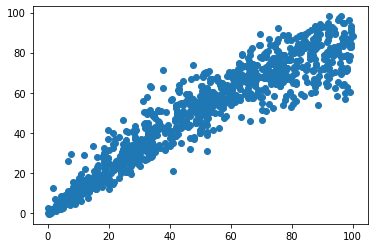

In [43]:
plt.scatter(y_test1,p)

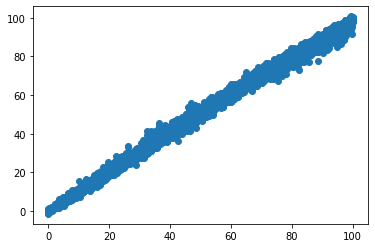

In [44]:
plt.scatter(y_train,q)

In [45]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 1.6645272912061617
R2 score of training set is 0.9966722128941378


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.756896363644737
R2 score of test set is 0.8901220576637842
